# Multinomial Naïve Bayes Classifier - the YouTube Spam Collection Data Set
Dataset from kaggle:
https://www.kaggle.com/datasets/lakshmi25npathi/images

Welcome! In this Project I'm willing to practice a classification problem with the Naïve Bayes Classificator.

I chose this Algorithm in order to practice it.

The problem to solve is to classify YouTube comments either as Spam or Ham.

The Dataset is found in Kaggle ([link here](https://www.kaggle.com/datasets/lakshmi25npathi/images)).

Well, let's Classify!

## Importing the necessary libreries

In [2]:
# pandas to handle the data and numpy for math calculations
import pandas as pd
import numpy as np

# train_test_split for separating in a reproducible way
from sklearn.model_selection import train_test_split

# CountVectorizer for transforming the comments in word's vectors
from sklearn.feature_extraction.text import CountVectorizer

# Two Naïve Bayes classifiers we are going to try
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# ConfusionMatrixDisplay and classification_report for Metrics visualization
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# To look through file
import os

# Reading and exploring the database

In [3]:
# Save the names of the files that contain the data in a list and print i
datasets_list = os.listdir('Data/')

print(datasets_list)

['Youtube01-Psy.csv', 'Youtube02-KatyPerry.csv', 'Youtube03-LMFAO.csv', 'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv']


As we can see, there are 5 files containing comments, each file for a different Youtube Video of a differente artist:

- Psy (The korean singer behind the world phenomenom Gangnam Style)
- Katy Perry
- LMFAO
- Eminem
- And from my home country Colombia ♥️: Shakira

In [4]:
# Load the data into DataFrames and store those DataFrames into a list
dataframes_list = [pd.read_csv(f'Data/{dataset}') for dataset in datasets_list]

# Loop to see the columns on each df
print("Columns for each df\n")
for df in dataframes_list:
    print(df.columns.values)

# See the shape in each df and the total amount of rows
rows_count = 0
print("\nShape of each df\n")
for df in dataframes_list:
    print(df.shape)
    rows_count += df.shape[0]

print('\nTotal of rows: ', rows_count)

Columns for each df

['COMMENT_ID' 'AUTHOR' 'DATE' 'CONTENT' 'CLASS']
['COMMENT_ID' 'AUTHOR' 'DATE' 'CONTENT' 'CLASS']
['COMMENT_ID' 'AUTHOR' 'DATE' 'CONTENT' 'CLASS']
['COMMENT_ID' 'AUTHOR' 'DATE' 'CONTENT' 'CLASS']
['COMMENT_ID' 'AUTHOR' 'DATE' 'CONTENT' 'CLASS']

Shape of each df

(350, 5)
(350, 5)
(438, 5)
(448, 5)
(370, 5)

Total of rows:  1956


As we can see, each dataframe contains the same columns (that's good luck for us).

The total amount of rows add up to 1956 comments

In [5]:
# Let's see what the one of the dfs cointains

dataframes_list[0].head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


# Preparing the data

We only need the last two columns: CONTENT and CLASS.
Let's drop them.

In [6]:
# Columns to Drop
dropping_columns = ['COMMENT_ID', 'AUTHOR', 'DATE']

# Loop through each df
for index in range(len(dataframes_list)):
    
    # Checking if one of the columns is on each df if the cell is run twice
    if dropping_columns[0] in dataframes_list[index].columns:
    
        # Dropping the columns on each df
        dataframes_list[index] = dataframes_list[index].drop(dropping_columns, axis=1)
    
    # Print the columns on each df after the drop
    print(dataframes_list[index].columns.values)
    
# Let's see
dataframes_list[0].head()

['CONTENT' 'CLASS']
['CONTENT' 'CLASS']
['CONTENT' 'CLASS']
['CONTENT' 'CLASS']
['CONTENT' 'CLASS']


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


After we droppped the columns we didn't need. Let's concatenate all the dfs

In [7]:
# Concatenate all dfs in just one
df = pd.concat(dataframes_list, axis=0, ignore_index=True)

# Let's confirm the number of rows
print('Rows before concatenating: ', rows_count, 'Rows after concatenating: ', df.shape[0])

# Let's see the output
df.head()

Rows before concatenating:  1956 Rows after concatenating:  1956


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


The numbers add up! Let's look for Null values

In [8]:
# Check null values per columns
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

Apparently the perfect data exists... Just kidding. Though having no null values helps a lot.

Let's check the distribution of the classes:

In [9]:
# Balance of the classes
df['CLASS'].value_counts(normalize=True)

1    0.513804
0    0.486196
Name: CLASS, dtype: float64

This is great! We have a pretty good and balanced dataset, this also helps a lot for the learning of the algorithm we are going to use.

Meanings of each class:

- Class 1: The comment is Spam
- Class 2: The comment is Ham

# Spliting the data

In [10]:
# Separating the columns into predictors (CONTENT) and target (CLASS)
input = df['CONTENT']
target = df['CLASS']

x_train, x_test, y_train, y_test = train_test_split(
                                                    input, # The predictors
                                                    target, # The target
                                                    test_size=.2, # Portion for splitting the data
                                                    stratify=target, # Columns to guide the stratification of the classes in the sets
                                                    random_state=365 # random state for reproducibility
                                                    )

In [11]:
# Let's check if the stratification worked
# y train
y_train.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

In [12]:
# Let's check if the stratification worked
# y test
y_test.value_counts(normalize=True)

1    0.512755
0    0.487245
Name: CLASS, dtype: float64

Apparently the stratification worked, let's continue

# Transforming the data

Let's take a look at the data

In [13]:
x_train.head()

513     https://www.facebook.com/pages/Nailey-nicool/6...
1821                                                   :)
973                  Check out this playlist on YouTube:﻿
916                     Check out this video on YouTube:﻿
1323    This past Christmas my dad passed away, to hel...
Name: CONTENT, dtype: object

As we can see it consists on comments, but how will the algorithm will read the information?

Well, we are going to use CountVectorizer from Sklearn. A class that turns the data into a matrix, in which each column represents a word (it does it with each word with a lenght greater than 1 letter). And each row represents how many times the word appeard in the comment.

Let's do it:

In [14]:
# Import CountVectorizer Class
vectorizer = CountVectorizer()

# Fit_transform our data in the training set
x_train_transf = vectorizer.fit_transform(x_train)

# Transform the data based only on the train set
x_test_transf = vectorizer.transform(x_test)

If you want to take a look to the matrix it generates (that is a scipy sparse matrix), you can take a look at it with the .toarray() method

In [15]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

We can see the words each column represent with the .get_feature_names_out() method

In [16]:
vectorizer.get_feature_names_out()

array(['00', '000', '002', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

Let's take a random sample:

In [17]:
# Random sample of the words that represent a column in the transformed data
np.random.choice(vectorizer.get_feature_names_out(), size=10)

array(['last', 'team', 'chubby', 'short', 'hw', 'donating', 'lane', 'fit',
       'loosing', 'countless'], dtype=object)

Let's see the lenght of the matrix

In [18]:
# Shape of the train predictors
print(x_train.shape)

# Shape of the transformed predictors
print(x_train_transf.shape)

(1564,)
(1564, 3814)


We can see that we get 3814 words in the entire training dataset.

Let's confirm this in the test set

In [19]:
# Shape of the test set and the transformed test set
print(x_test.shape)
print(x_test_transf.shape)

(392,)
(392, 3814)


Well, we are ready to train our model!

# Model Training

Well, we are going to use two classificators (very used in text classification) for Naïve Bayes from Sklearn and checked their performances:

- **MultinomialNB:** Uses relative frequency countings for calculating probabilities
- **ComplementNB:** Adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets

## 1. Default MultinomialNB

In [20]:
# Set the class Multinomial NB
clf = MultinomialNB()

# Fit the train set to it
clf.fit(x_train_transf, y_train)

MultinomialNB()

Let's check the parameters

In [21]:
# We can check the parameters. Alpha is a Smoothing parameter that does not allow probabilities to be zero
# Class priors: probabilities of belonging to each class
# Fit prior: if the priors should be calculated from the data or should be considered to be uniformed
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Let's predict

In [22]:
# Make predictions out of test set
y_test_predict = clf.predict(x_test_transf)

Let's see its performance:

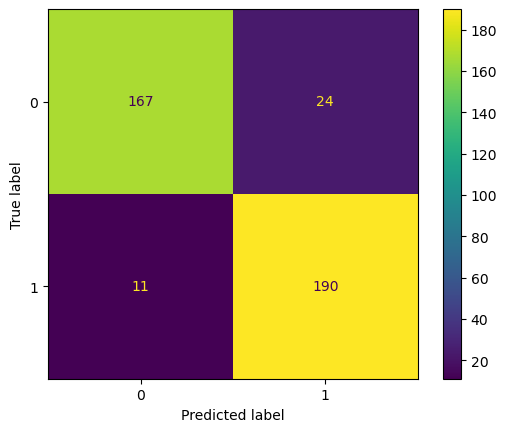

In [23]:
# Class that displays Confussion Matrix with a heatmap
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_predict,
    labels=clf.classes_
);

Let's take a look at some other metrics

In [24]:
# Metrics report
print(classification_report(y_test, y_test_predict, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.87      0.91       191
        Spam       0.89      0.95      0.92       201

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



As we can see it performed quite well in the Spam Precision, however, let's see if we can improve this value

## 2. MultinomialNB Adjusting Priors

Well let's make a simple assumption: The internet normally behaves better and the percentage of Spam comments is lower than the Ham ones, so let's change the priors to:

- Ham comments: 60%
- Spam comments: 40%

Let's check how this performs

In [25]:
# MultinomialNB with changed priors
clf2 = MultinomialNB(class_prior=[.6, .4])

# Fit values
clf2.fit(x_train_transf, y_train)

# Print the params
print(clf2.get_params())

{'alpha': 1.0, 'class_prior': [0.6, 0.4], 'fit_prior': True}


Let's see its predictions

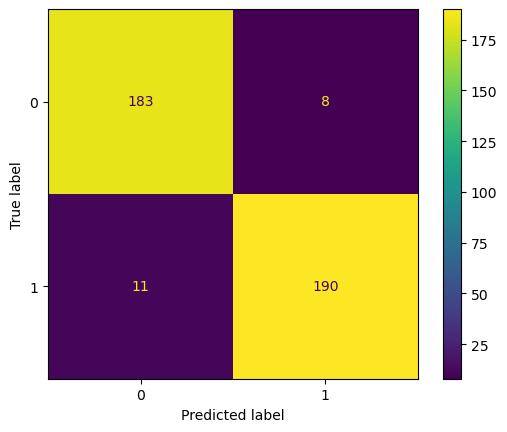

In [26]:
# Predict
y_test_predict2 = clf2.predict(x_test_transf)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict2,
    labels=clf2.classes_
);

Wow, the False Positives decreased, let's look at the metrics

In [27]:
print(classification_report(y_test, y_test_predict2, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.96      0.95       191
        Spam       0.96      0.95      0.95       201

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392



Indeed, the recall improved a lot as it was one of the lowest values for the Ham predictions.

Let's take this to another level

## 3. MultinomialNB Adjusting Priors vol 2

Let's use other distribution and assume that the internet behaves way better

- Ham comments: 70%
- Spam comments: 30%

Let's check how this performs

In [28]:
# MultinomialNB with changed priors
clf3 = MultinomialNB(class_prior=[.7, .3])

# Fit values
clf3.fit(x_train_transf, y_train)

# Print the params
print(clf3.get_params())

{'alpha': 1.0, 'class_prior': [0.7, 0.3], 'fit_prior': True}


Let's see its predictions

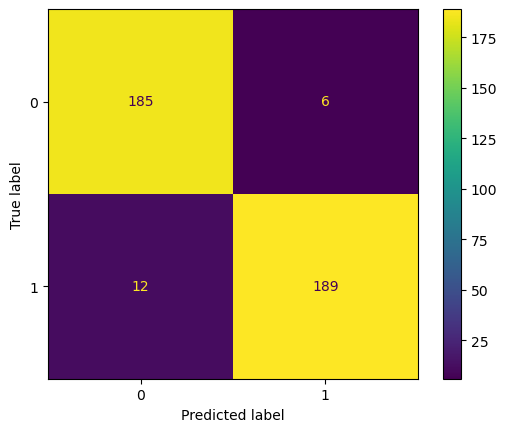

In [29]:
# Predict
y_test_predict3 = clf3.predict(x_test_transf)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict3,
    labels=clf3.classes_
);

The False Positives decreased again, however it seems that from this point the false negatives seem to start increasing at this point. Let's take a look at the metrics:

In [30]:
print(classification_report(y_test, y_test_predict3, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.97      0.95       191
        Spam       0.97      0.94      0.95       201

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392



Nevertheless we achive to improve the precision for Spams one point! This shows the importance for trying out different parameters. I will choose this model as our classifier

## Bonus: ComplimentNB

Deep inside me wanted to try out this one because it has shown better results for text classification. Let's see how it goes with the parameters from the classifier we chose.

{'alpha': 1.0, 'class_prior': [0.7, 0.3], 'fit_prior': True, 'norm': False}


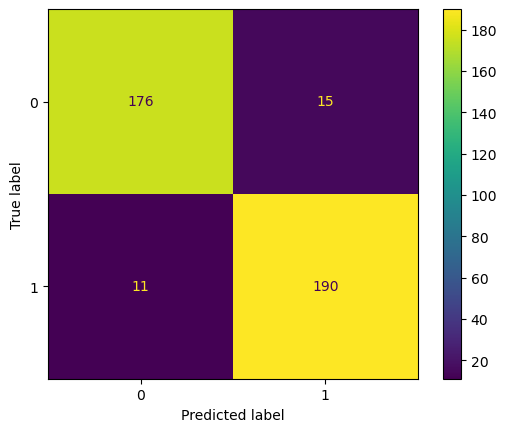

In [31]:
clf4 = ComplementNB(class_prior=[0.7,0.3])
clf4.fit(x_train_transf, y_train)
print(clf4.get_params())

y_test_predict4 = clf4.predict(x_test_transf)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_predict4,
    labels=clf4.classes_
);

In [32]:
print(classification_report(y_test, y_test_predict4, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.92      0.93       191
        Spam       0.93      0.95      0.94       201

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



Well, it seems that the results were real good, however it seems that because the dataset was well balanced, the MultinomialNB gives better results with the priors = [0.7, 0.3].

# Conclusion and prediction

Let's do some predictions:

In [33]:
# Transform two made up comments, One that is a Ham and one that is Spam, respectively
data_to_predict = vectorizer.transform(['Shakira is the best, love to Colombia!',
                                        'click here to earn easy money, 100% real'])

# Prediction
clf3.predict(data_to_predict)

array([0, 1], dtype=int64)

Effectively, the prediction was correct.

We can conclude that Naive Bayes is efficent as a text Classifier with great performance. Let's see in next commits how we can take this to another level.

Thanks for reading